In [3]:
import pandas as pd
from sklearn import svm
from sklearn import ensemble
import random
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import scipy.spatial.distance as spsd


data=pd.read_csv('cisc5352.project.1.option_data.csv')
kernellist=['rbf','linear']
ncol=len(data)
sample=[] #random numbers list
for i in range(2000):
    sample.append(random.randint(0,ncol))
data_2000=data.ix[sample,:]
datax=data_2000.ix[:,0:7]
datay=data_2000.ix[:,7]
 
test_percent=0.2
training_data, test_data, training_data_response, test_data_response = train_test_split(datax, datay, test_size=test_percent,random_state=42)

#Euclidean distance, general_knn
general_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', metric='euclidean')
general_kNN.fit(training_data, training_data_response)
predict_ge=general_kNN.predict(test_data)
#print("The predicted response for test data within general k-NN method, and Enclidean distance weights is:\n")
#print(predict_ge)

#Euclidean distance, kdtree_knn
kdtree_kNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='kd_tree', metric='euclidean')
kdtree_kNN.fit(training_data, training_data_response)
predict_te=kdtree_kNN.predict(test_data)
#print("The predicted response for test data within kd-tree k-NN method, and Enclidean distance weights is:\n")
#print(predict_te)


#accuracy
n_predict=len(test_data_response)
MSE_ge=(1/n_predict)*(sum(pow((predict_ge-test_data_response),2)))
MSE_te=1/n_predict*sum(pow(predict_te-test_data_response,2))

#svm
svm_learning_machine_rbf=svm.SVR(kernel='rbf')
svm_learning_machine_rbf.fit(training_data,training_data_response)

svm_learning_machine_linear=svm.SVR(kernel='linear')
svm_learning_machine_linear.fit(training_data,training_data_response)


#svm_learning_machine_poly=svm.SVR(kernel='poly')
#svm_learning_machine_poly.fit(training_data,training_data_response)

#svm_learning_machine_sigmoid=svm.SVR(kernel='sigmoid')
#svm_learning_machine_sigmoid.fit(training_data,training_data_response)

svm_predict_rbf=svm_learning_machine_rbf.predict(test_data)
svm_predict_linear=svm_learning_machine_linear.predict(test_data)
#svm_predict_poly=svm_learning_machine_poly.predict(test_data)
#svm_predict_sigmoid=svm_learning_machine_sigmoid.predict(test_data)

#print("\n the result with rbf kernel" )
#print(svm_predict_rbf)
#print("\n the result with linear kernel" )
#print(svm_predict_linear)
#print("\n the result with poly kernel" )
#print(svm_predict_poly)
#print("\n the result with sigmoid kernel" )
#print(svm_predict_sigmoid)


#accuracy
n_predict=len(svm_predict_rbf)
MSE_svm_rbf=1/n_predict*sum(np.power(svm_predict_rbf-test_data_response,2))
MSE_svm_linear=1/n_predict*sum(np.power(svm_predict_linear-test_data_response,2))

#Random Forest
params1={'n_estimators':20 ,'min_samples_split':2}
rf=ensemble.GradientBoostingRegressor(**params1)
rf.fit(training_data,training_data_response)
rf_predict=rf.predict(test_data)
#print('random forest')
#print(rf_predict)
#accuracy
n_predict=len(svm_predict_rbf)
MSE_rf=1/n_predict*sum(np.power(rf_predict-test_data_response,2))


#Gradient Boosting
params2={'n_estimators': 1000, 'max_depth':6, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
gb= ensemble.GradientBoostingRegressor(**params2)
gb.fit(training_data,training_data_response)
gb_predict=gb.predict(test_data)
#print('gradient boosting')
#print(gb_predict)

#accuracy
n_predict=len(svm_predict_rbf)
MSE_gb=1/n_predict*sum(np.power(gb_predict-test_data_response,2))

In [4]:
import statistics
import numpy as np

n_predict=len(svm_predict_rbf)
mse_1=MSE_ge
mse_2=MSE_te
mse_3=MSE_svm_rbf
mse_4=MSE_svm_linear
mse_5=MSE_rf
mse_6=MSE_gb


#ensemble 1
ensemble1_predict=(predict_ge+predict_te+svm_predict_rbf+svm_predict_linear+rf_predict+gb_predict)/6
#print(ensemble1_predict)

#ensemble 2
ensemble2_predict=list()
for i in range(400):
    s=statistics.median([predict_ge[i],predict_te[i],svm_predict_rbf[i],+svm_predict_linear[i],+rf_predict[i],gb_predict[i]])
    ensemble2_predict.append(s)
print(ensemble2_predict)


#ensemble 3
w_1=1-mse_1/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_2=1-mse_2/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_3=1-mse_3/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_4=1-mse_4/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_5=1-mse_5/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
w_6=1-mse_6/(mse_1+mse_2+mse_3+mse_4+mse_5+mse_6)
ensemble3_predict=predict_ge*w_1+predict_te*w_2+svm_predict_rbf*w_3+svm_predict_linear*w_4+rf_predict*w_5+gb_predict*w_6
#print(ensemble3_predict)

#ensemble 4
w_1_new=1-w_1
w_2_new=1-w_2
w_3_new=1-w_3
w_4_new=1-w_4
w_5_new=1-w_5
w_6_new=1-w_6
ensemble4_predict=predict_ge*w_1_new+predict_te*w_2_new+svm_predict_rbf*w_3_new+svm_predict_linear*w_4_new+rf_predict*w_5_new+gb_predict*w_6_new
#print(ensemble4_predict)

[0.55619325842546119, 0.28723306534610471, 0.28940972473718807, 0.44898669901879118, 0.48999637918935735, 0.61923686924544996, 0.53915219268303127, 0.31552701962992713, 0.65958159486400625, 0.3194873529835886, 0.27779248546130647, 0.37520391430171096, 0.38290276455265443, 0.28901600139378358, 0.31905491127579377, 0.43729566824642979, 0.39349275348209445, 0.35071094936983549, 0.30749281989802557, 0.40046632884965783, 0.42163012332295358, 0.34738010880870684, 0.58471828176109097, 0.40311456415150054, 0.29213180272915729, 0.4150394669106281, 0.40408232394186494, 0.57391174060823902, 0.51495065542486973, 0.24068126709239787, 0.24609422004223777, 0.30079801924384486, 0.27635725620631502, 0.52934029822159623, 0.51840605937736473, 0.42538055672769925, 0.28977229438124358, 0.27186993501019346, 0.40494445570717041, 0.18369330463665284, 0.33775414627995337, 0.33526922592814767, 0.45039128901219455, 0.30340653589451483, 0.14635661160863939, 0.46954887894812108, 0.37379477999131844, 0.412565452161

In [5]:
from sklearn import linear_model
training_data, test_data, training_data_response, test_data_response = train_test_split(datax, datay, test_size=test_percent,random_state=42)

from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(activation='logistic')
clf.fit(training_data,training_data_response)


neural_network_predict = clf.predict(test_data)
MSE_mlp = (1/n_predict)*(sum(np.power((neural_network_predict - test_data_response),2)))


training_data = np.asarray(training_data, dtype="S32")
training_data_response = np.asarray(training_data_response, dtype="S32")
lr_learning_machine=linear_model.LogisticRegression()
lr_learning_machine.fit(training_data,training_data_response)
lr_predict=lr_learning_machine.predict(test_data)
lr_predict = np.asarray(lr_predict, dtype="float64")
MSE_lr=(1/n_predict)*(sum(np.power((lr_predict - test_data_response),2)))

In [6]:
MSE_ensemble1 = 1/n_predict*sum(pow(ensemble1_predict-test_data_response,2))
MSE_ensemble2 = 1/n_predict*sum(pow(ensemble2_predict-test_data_response,2))
MSE_ensemble3 = 1/n_predict*sum(pow(ensemble3_predict-test_data_response,2))
MSE_ensemble4 = 1/n_predict*sum(pow(ensemble4_predict-test_data_response,2))

[]

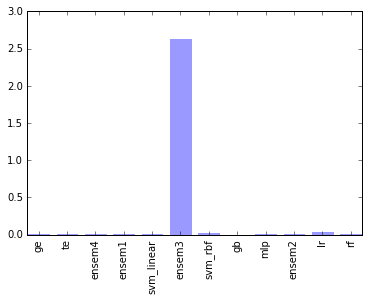

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
MSE_dict= {'ge':MSE_ge,'te':MSE_te,
           'svm_rbf':MSE_svm_rbf,
           'svm_linear':MSE_svm_linear,
           'rf':MSE_rf,
           'gb':MSE_gb,
           'ensem1':MSE_ensemble1,
           'ensem2':MSE_ensemble2,
           'ensem3':MSE_ensemble3,
           'ensem4':MSE_ensemble4,
           'lr':MSE_lr,
           'mlp': MSE_mlp 
           
}
plt.bar(range(len(MSE_dict)), MSE_dict.values(), color = '#9999ff', align='center', edgecolor='w')
plt.xticks(range(len(MSE_dict)), MSE_dict.keys(),rotation = 'vertical')
plt.plot()

[]

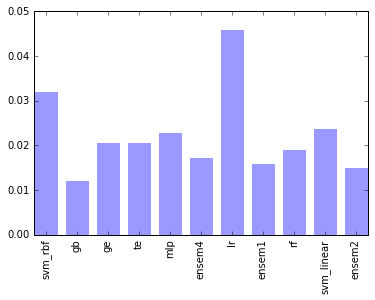

In [8]:
MSE_dict_2= {'ge':MSE_ge,'te':MSE_te,
           'svm_rbf':MSE_svm_rbf,
           'svm_linear':MSE_svm_linear,
           'rf':MSE_rf,
           'gb':MSE_gb,
           'ensem1':MSE_ensemble1,
           'ensem2':MSE_ensemble2,
           #'ensem3':MSE_ensemble3,
           'ensem4':MSE_ensemble4,
           'lr':MSE_lr,
           'mlp': MSE_mlp     
}
plt.bar(range(len(MSE_dict_2)), MSE_dict_2.values(), color = '#9999ff', align='center', edgecolor='w')
plt.xticks(range(len(MSE_dict_2)), MSE_dict_2.keys(),rotation = 'vertical')
plt.plot()

In [10]:
test_data_response = np.array(test_data_response)
# learner's sample deviation
delta_ge = abs(predict_ge - test_data_response)
delta_te = abs(predict_te - test_data_response)
delta_svm_linear = abs(svm_predict_linear - test_data_response)
delta_svm_rbf = abs(svm_predict_rbf - test_data_response)
delta_rf = abs(rf_predict - test_data_response)
delta_gb = abs(gb_predict - test_data_response)


# ensembles' sample deviation
delta_ensemble1 = abs(ensemble1_predict - test_data_response)
delta_ensemble2 = abs(ensemble2_predict - test_data_response)
delta_ensemble3 = abs(ensemble3_predict - test_data_response)
delta_ensemble4 = abs(ensemble4_predict - test_data_response)

# peer's sample deviation

delta_lr = abs(lr_predict - test_data_response)
delta_mlp = abs(neural_network_predict - test_data_response)
test_data_response = np.array(test_data_response)

In [11]:
from sklearn.metrics import r2_score

r2_ge = r2_score(test_data_response, predict_ge)
r2_te = r2_score(test_data_response, predict_te)
r2_svm_linear = r2_score(test_data_response, svm_predict_linear)
r2_svm_rbf = r2_score(test_data_response, svm_predict_rbf)
r2_rf = r2_score(test_data_response, rf_predict)
r2_gb = r2_score(test_data_response, gb_predict)


r2_ensemble1 = r2_score(test_data_response, ensemble1_predict)
r2_ensemble2 = r2_score(test_data_response, ensemble2_predict)
r2_ensemble3 = r2_score(test_data_response, ensemble3_predict)
r2_ensemble4 = r2_score(test_data_response, ensemble4_predict)

r2_lr = r2_score(test_data_response, lr_predict)
r2_mlp = r2_score(test_data_response, neural_network_predict)

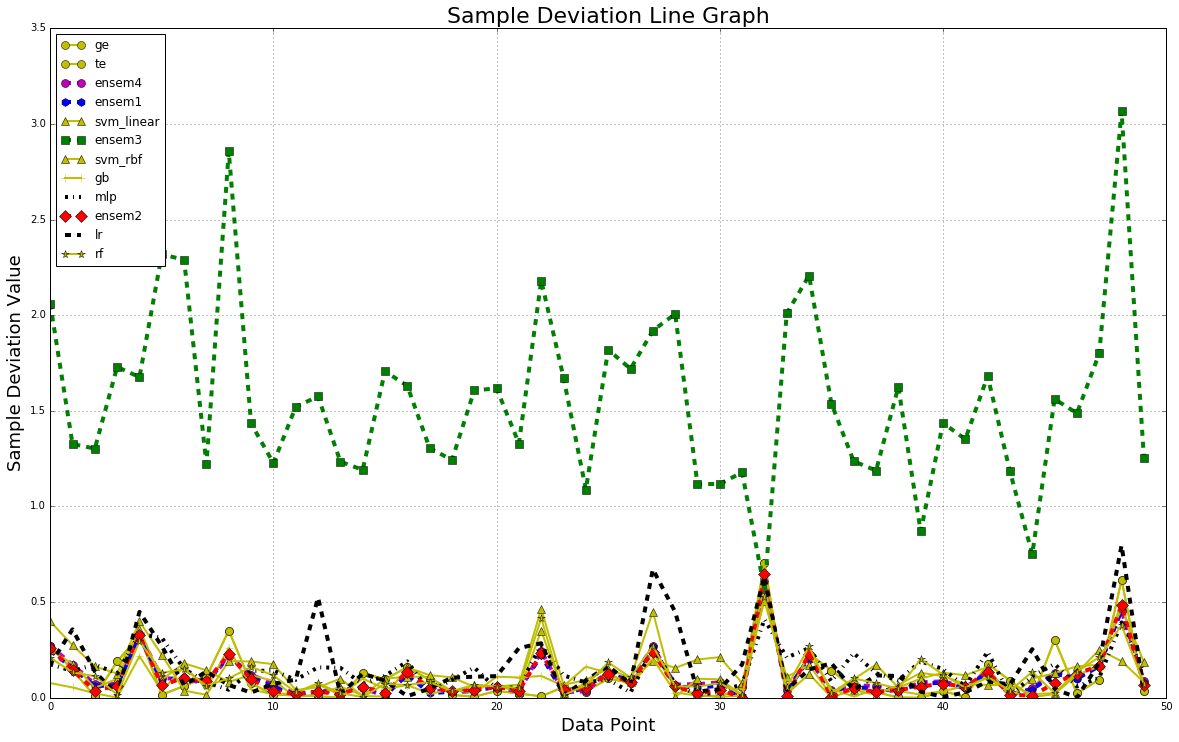

In [22]:
n = 50

delta_dict= {'ge':delta_ge[:n],
             'te':delta_te[:n],
           'svm_rbf':delta_svm_rbf[:n],
           'svm_linear':delta_svm_linear[:n],
           'rf':delta_rf[:n],
           'gb':delta_gb[:n],
           'ensem1':delta_ensemble1[:n],
           'ensem2':delta_ensemble2[:n],
           'ensem3':delta_ensemble3[:n],
           'ensem4':delta_ensemble4[:n],
           'lr':delta_lr[:n],
           'mlp': delta_mlp[:n]          
}

r2_dict= {'ge':r2_ge,
            'te':r2_te,
           'svm_rbf':r2_svm_rbf,
           'svm_linear':r2_svm_linear,
           'rf':r2_rf,
           'gb':r2_gb,
           'ensem1':r2_ensemble1,
           'ensem2':r2_ensemble2,
           'ensem3':r2_ensemble3,
           'ensem4':r2_ensemble4,
           'lr': r2_lr,
           'mlp': r2_mlp          
}

plot_dict = {'ge':'yo-',
             'te':'yo-',
           'svm_rbf':'y^-',
           'svm_linear':'y^-',
           'rf':'y*-',
           'gb':'y+-',
           'ensem1':'bh--',
           'ensem2':'rD--',
           'ensem3':'gs--',
           'ensem4':'mo--',
           'lr':'k--',
           'mlp': 'k-.' }

fig1 = plt.figure(figsize=(20,12), dpi=300)

for key in delta_dict:
    
    if key in ['ge', 'te', 'svm_rbf', 'svm_linear', 'rf', 'gb']:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=2, markersize=8)
    elif key in ['ensem1', 'ensem2', 'ensem3', 'ensem4']:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=4, markersize=8)
    else:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=4)
        
    plt.legend(loc='upper left')
    plt.xlabel('Data Point', fontsize= 18)
    plt.ylabel('Sample Deviation Value', fontsize= 18)
    plt.grid('on')
    plt.title('Sample Deviation Line Graph', fontsize= 22)
    
fig1.savefig("sample_deviation_values_cisc.png")
plt.show()

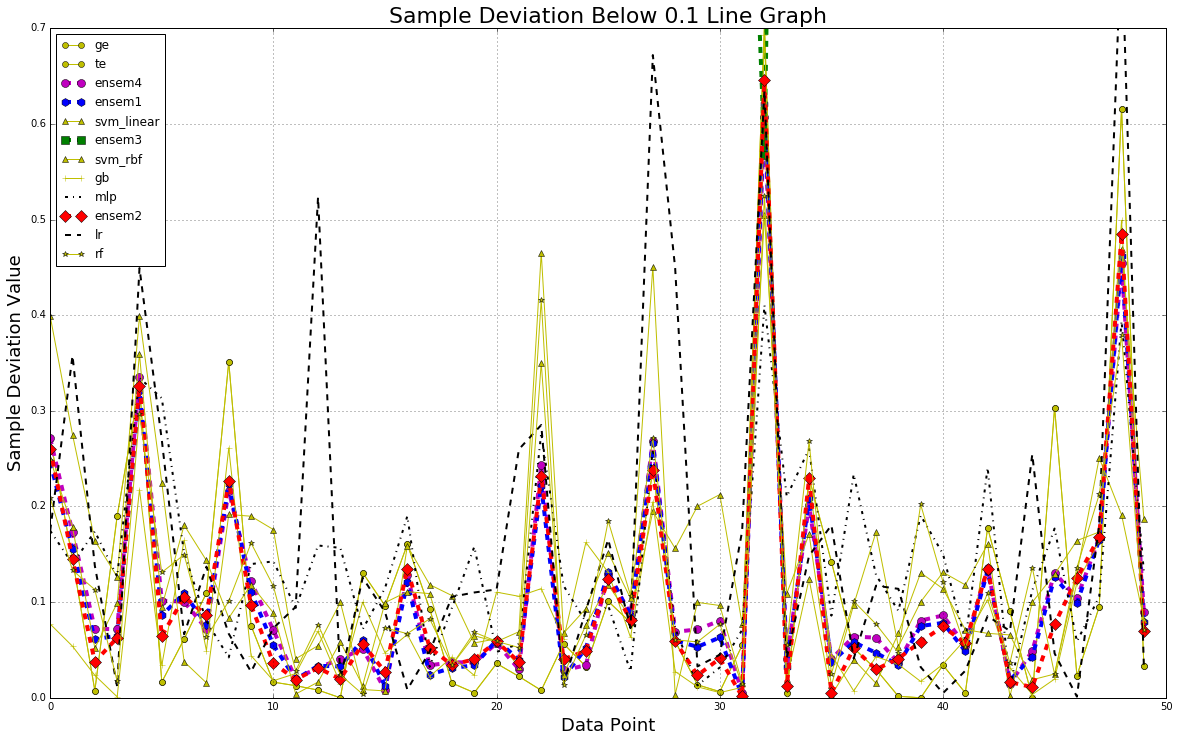

In [24]:
fig2 = plt.figure(figsize=(20,12), dpi=300)
for key in delta_dict:
    
    if key in ['ge', 'te', 'svm_rbf', 'svm_linear', 'rf', 'gb']:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=1, markersize=6)
    elif key in ['ensem1', 'ensem2', 'ensem3', 'ensem4']:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=4, markersize=8)
    else:
        plt.plot(delta_dict[key], plot_dict[key], label=key, linewidth=2)
        
    plt.legend(loc='upper left')
    plt.xlabel('Data Point', fontsize= 18)
    plt.ylabel('Sample Deviation Value', fontsize= 18)
    plt.grid('on')
    plt.ylim(0,0.7)
    plt.title('Sample Deviation Below 0.1 Line Graph', fontsize= 22)
    
fig2.savefig("sample_deviation_values2_cisc.png")
plt.show()

[]

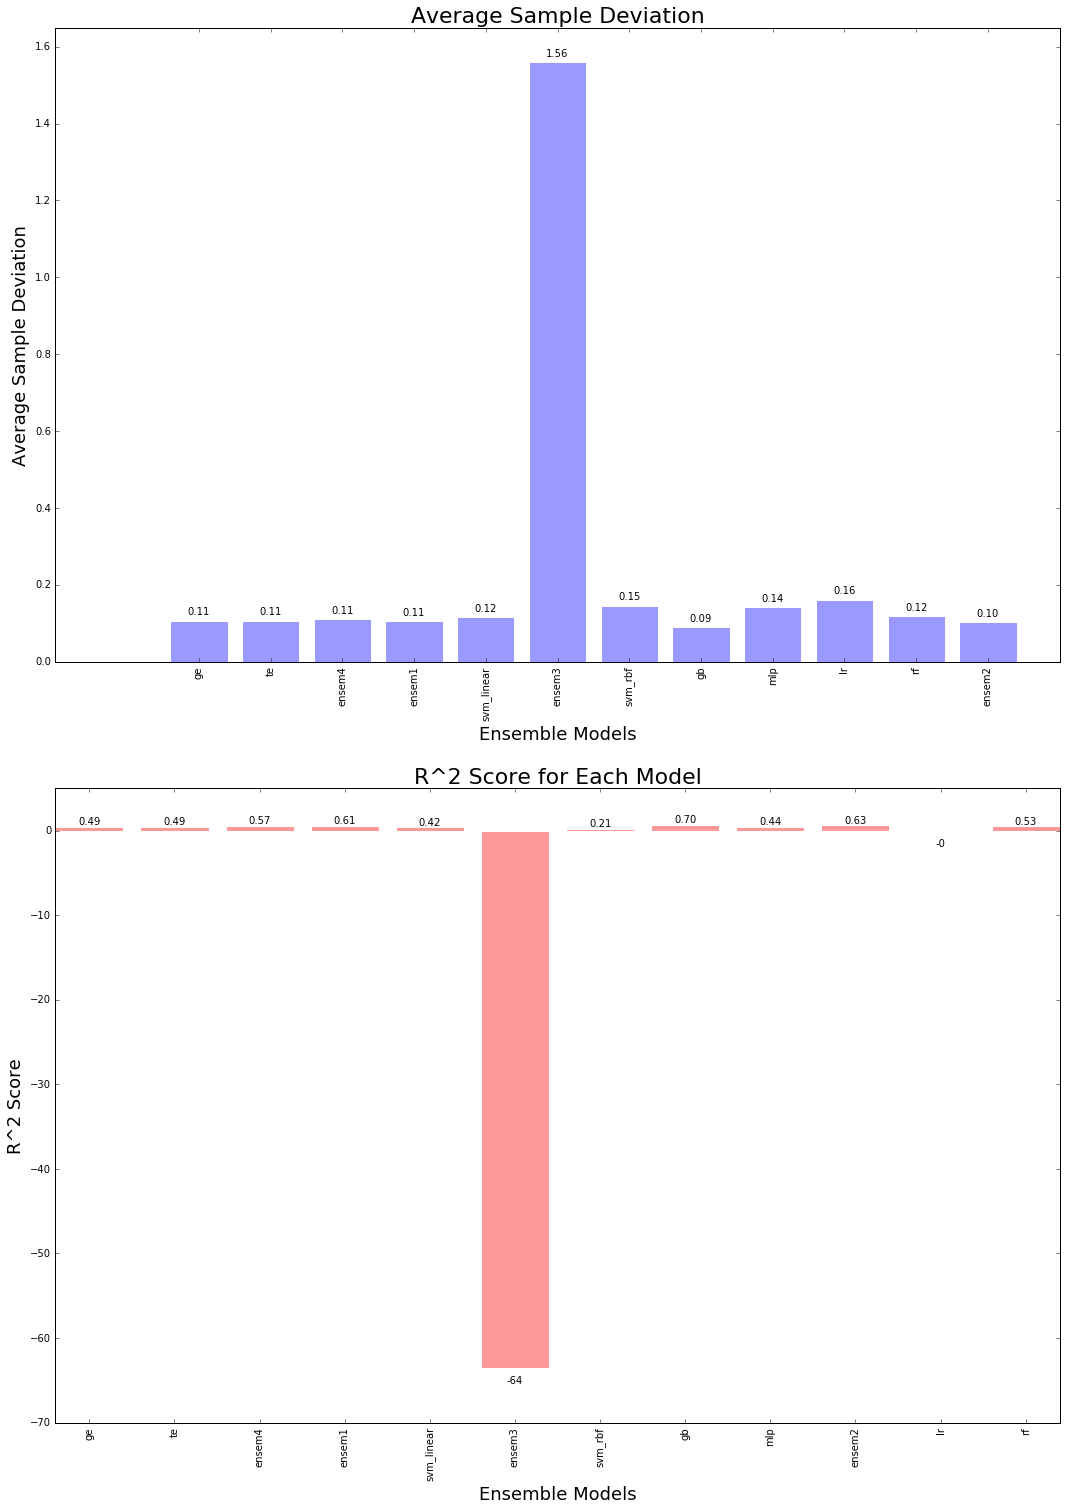

In [26]:
new_delta_dict = {}
ind = np.arange(len(r2_dict))

fig3 = plt.figure(figsize=(18,25), dpi=300)

plt.subplot(211)
for key in delta_dict:
    new_delta_dict[key] = delta_dict[key].mean()
ax1 = plt.bar(ind, new_delta_dict.values(), color = '#9999ff', align='center', edgecolor='w')
plt.xticks(ind, new_delta_dict.keys(), rotation = 'vertical')
plt.xlabel('Ensemble Models', fontsize= 18)
plt.ylabel("Average Sample Deviation", fontsize= 18)
plt.title('Average Sample Deviation', fontsize= 22)
plt.ylim(0,1.65)
for x, y in zip(ind, new_delta_dict.values()):
    plt.text(x, y+0.01, '{:.2f}'.format(y), ha='center', va= 'bottom')

plt.subplot(212)

ax2 = plt.bar(ind, r2_dict.values(), color = '#ff9999', align='center', edgecolor='w')
plt.xticks(ind, r2_dict.keys(), rotation = 'vertical')
plt.xlabel('Ensemble Models', fontsize= 18)
plt.ylabel("R^2 Score", fontsize= 18)
plt.title('R^2 Score for Each Model', fontsize= 22)
plt.ylim(-70,5)
for x, y in zip(ind, r2_dict.values()):
    if y < 0:
        plt.text(x, y-2, '{:.0f}'.format(y), ha='center', va= 'bottom')
    else:
        plt.text(x, y+0.03, '{:.2f}'.format(y), ha='center', va= 'bottom')

fig3.savefig("average_sample_deviation_and_R2_score_cisc.png")
plt.plot()

[]

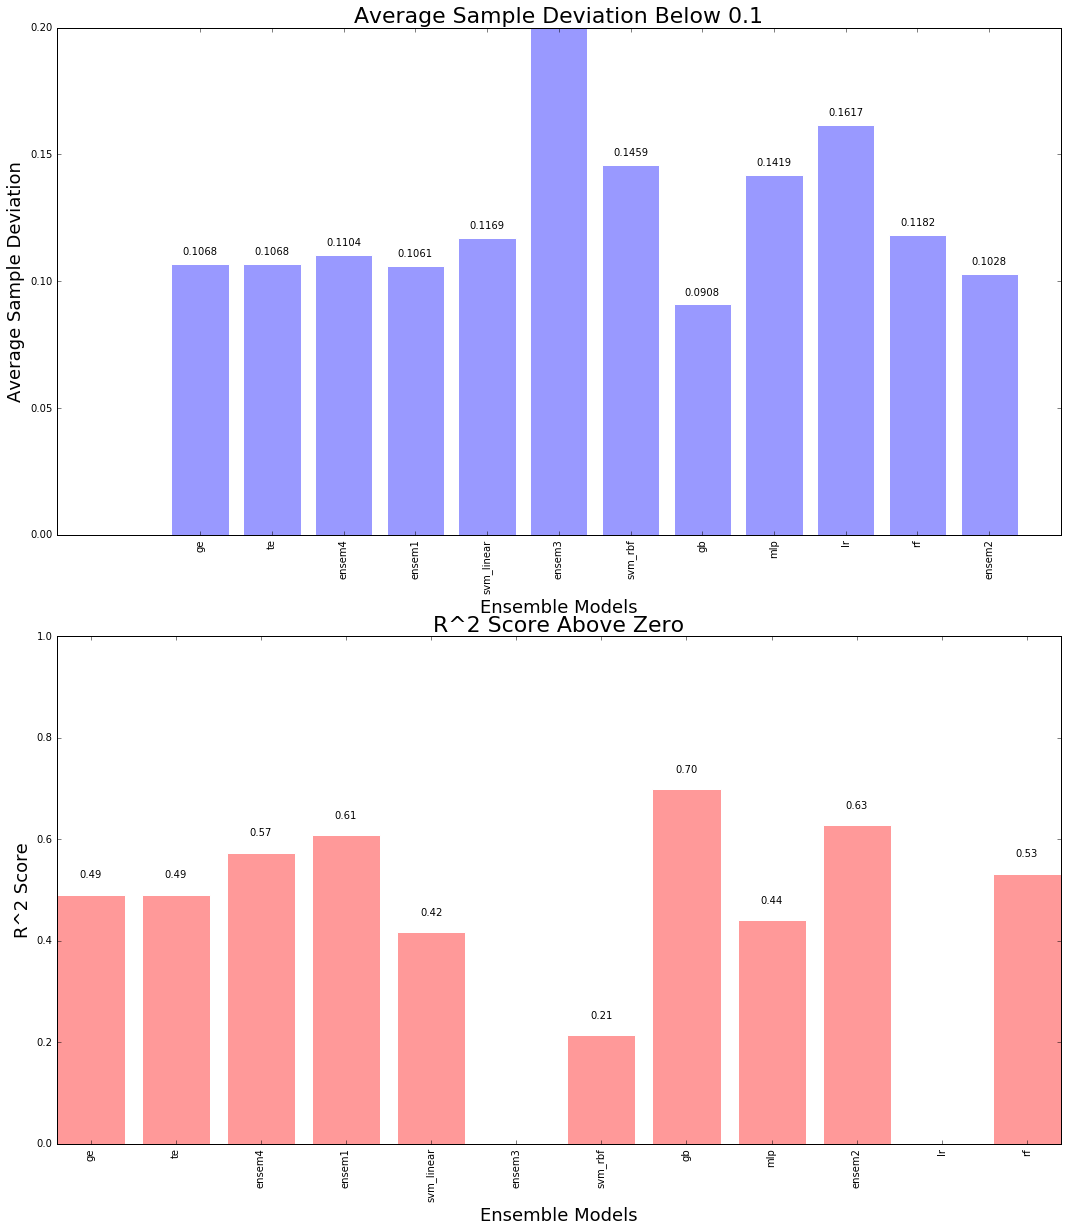

In [27]:
fig4 = plt.figure(figsize=(18,20), dpi=300)

plt.subplot(211)
plt.bar(ind, new_delta_dict.values(), color = '#9999ff', align='center', edgecolor='w')
plt.xticks(ind, new_delta_dict.keys(),rotation = 'vertical')
plt.xlabel('Ensemble Models', fontsize= 18)
plt.ylabel("Average Sample Deviation", fontsize= 18)
plt.title('Average Sample Deviation Below 0.1', fontsize= 22)
plt.ylim(0,0.2)

for x, y in zip(ind, new_delta_dict.values()):
    if y > 0.2:
        plt.text(x, y, '', ha='center', va= 'bottom')
    else:
        
        plt.text(x, y+0.003, '{:.4f}'.format(y), ha='center', va= 'bottom')


plt.subplot(212)

plt.bar(ind, r2_dict.values(), color = '#ff9999', align='center', edgecolor='w')
plt.xticks(ind, r2_dict.keys(), rotation = 'vertical')
plt.xlabel('Ensemble Models', fontsize= 18)
plt.ylabel("R^2 Score", fontsize= 18)
plt.ylim(0,1)
plt.title('R^2 Score Above Zero', fontsize= 22)

for x, y in zip(ind, r2_dict.values()):
    if y < 0:
        plt.text(x, y, '', ha='center', va= 'bottom')
    else:
        plt.text(x, y+0.03, '{:.2f}'.format(y), ha='center', va= 'bottom')


fig4.savefig("average_sample_deviation_and_R2_score2_cisc.png")
plt.plot()

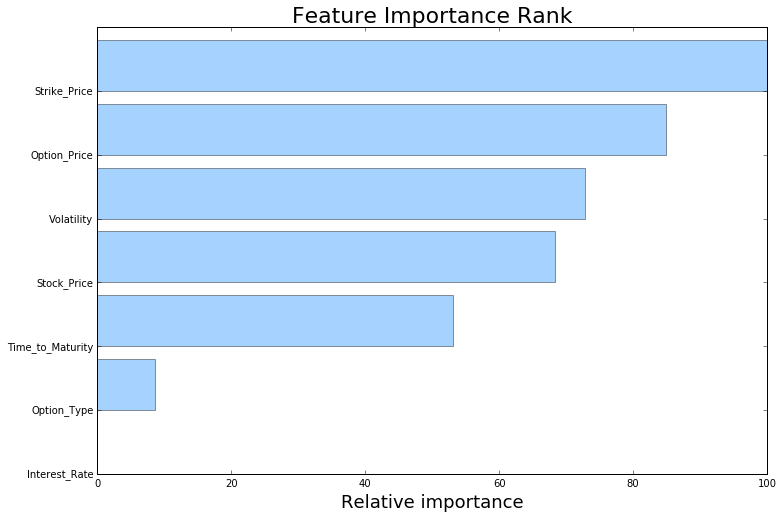

In [35]:
f = gb.feature_importances_
f = 100.0 * (f / f.max())
indices = np.argsort(f)[-7:]

fig5 = plt.figure(figsize=(12,8), dpi=300)
plt.barh(np.arange(7), f[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(7 + 0.25), np.array(datax.columns)[indices])
_ = plt.xlabel('Relative importance', fontsize= 18), plt.title('Feature Importance Rank', fontsize= 22)

fig5.savefig('feature_importance_rank_cisc.png')

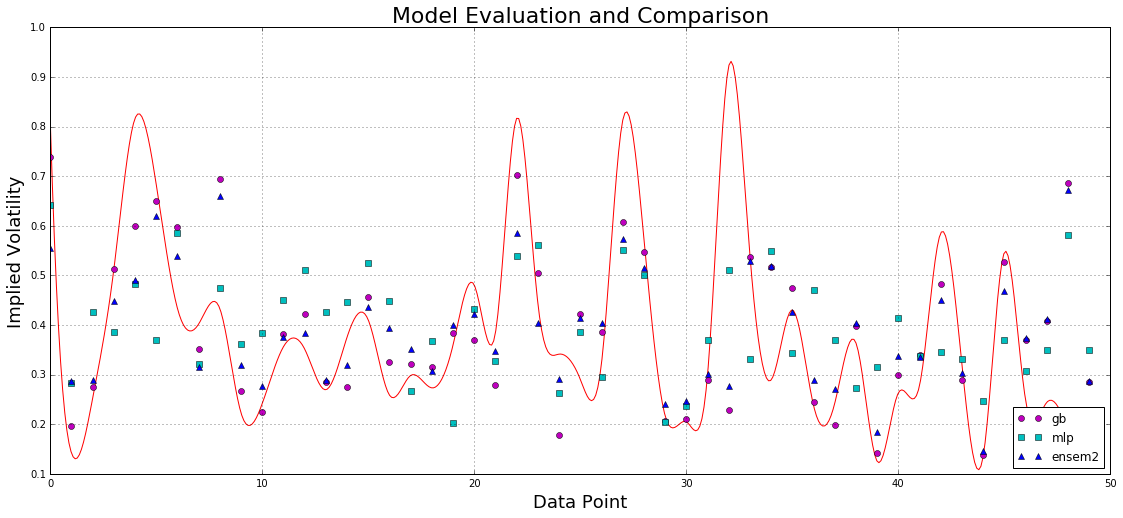

In [30]:
from scipy.interpolate import spline 
n = 50

model_dict = {'gb': gb_predict[:n],
              'ensem2': ensemble2_predict[:n],
              'mlp': neural_network_predict[:n]}

plot_dict = {'gb':'mo',
           'ensem2':'b^',
           'mlp':'cs' }
fig6 = plt.figure(figsize=(19,8), dpi=300)
N = len(test_data_response[:n])
x = np.arange(N)
y = test_data_response[:n]
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x, y, x_smooth)

plt.plot(x_smooth, y_smooth, 'r', linewidth=1)
for key in model_dict:
    
    plt.plot(model_dict[key], plot_dict[key], label=key)

plt.legend(loc='lower right')
plt.xlabel('Data Point', fontsize= 18)
plt.ylabel('Implied Volatility', fontsize= 18)
plt.grid('on')
    
plt.title('Model Evaluation and Comparison', fontsize= 22)
fig6.savefig('model_evaluation_cisc.png')
    
plt.show()